# Week 6: Global circulation
### MAQ - 32806, Chiel van Heerwaarden & Imme Benedict, 2016
In this assignment, you are going to analyze daily values of temperature, geopotential and zonal and meridional wind of the last winter (1 December 2015 to 1 March 2016) with the goal to learn the structure of the global circulation.

___
First, we load the required packages

In [1]:
import numpy as np              # Numpy is the fundamental package for scientific computing in Python.
import netCDF4 as nc            # NetCDF is the data format of the meteorological data that we use.
import matplotlib.pyplot as pl  # Matplotlib is a scientific plotting package.
from mpl_toolkits.basemap import Basemap # Import the map plotting interface.
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%matplotlib inline
pl.rcParams.update({'font.size': 11})          # Set the standard font size of the plots to 11pt.
pl.rcParams.update({'figure.figsize': [13,5]}) # Set the standard figure size.

___
### Setting up a Python Basemap and read out 3D fields
With the code below, you initialize the world map with the desired coordinates.

In [2]:
# We define a map of the northern hemisphere that is stored in the m object.
lon_start =  -180.
lon_end   =   180.
lat_start =   -90.
lat_end   =    90.
m = Basemap(llcrnrlon=lon_start,
            llcrnrlat=lat_start,
            urcrnrlon=lon_end,
            urcrnrlat=lat_end,
            projection='cyl', resolution='l')

Now, you load the data and read out the desired variables from a NetCDF file from the ECMWF ERA-Interim data archive.

In [3]:
nc_file = nc.Dataset("data/era_data3.nc", "r")
lat = nc_file.variables["latitude"][:]
lon = nc_file.variables["longitude"][:]

nroll = lon.size//2
lon = np.roll(lon, nroll)
lon = np.where(lon>=180., lon-360., lon)

u_850   = np.roll(nc_file.variables["u"][:,0,:,:], nroll, -1)
v_850   = np.roll(nc_file.variables["v"][:,0,:,:], nroll, -1)
Phi_850 = np.roll(nc_file.variables["z"][:,0,:,:], nroll, -1)
T_850   = np.roll(nc_file.variables["t"][:,0,:,:], nroll, -1)

u_300   = np.roll(nc_file.variables["u"][:,1,:,:], nroll, -1)
v_300   = np.roll(nc_file.variables["v"][:,1,:,:], nroll, -1)
Phi_300 = np.roll(nc_file.variables["z"][:,1,:,:], nroll, -1)
T_300   = np.roll(nc_file.variables["t"][:,1,:,:], nroll, -1)
time = np.arange(0, u_850.shape[0])

nc_file.close()

Below, we define a few convenient functions, similar as in earlier assignments.

In [4]:
lons, lats = m(*np.meshgrid(lon, lat))

def get_time_index(time_plot):
    return abs(time-time_plot).argmin()

def get_lat_index(lat_plot):
    return abs(lat-lat_plot).argmin()

def get_lon_index(lon_plot):
    if(lon_plot > 180.):
        lon_plot = lon_plot - 360.
    return abs(lon-lon_plot).argmin()

___
### World maps of temperature and geopotential
In this assignment, you are going to analyze the structure and most important elements of the global circulation. To start, below you find two maps at 300 hPa: one with temperature and one with meridional velocity.

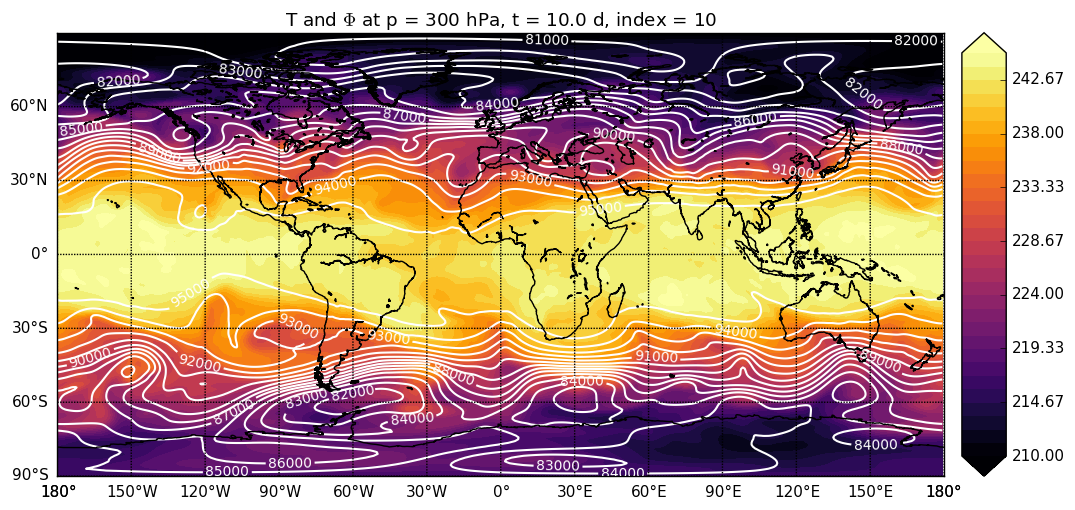

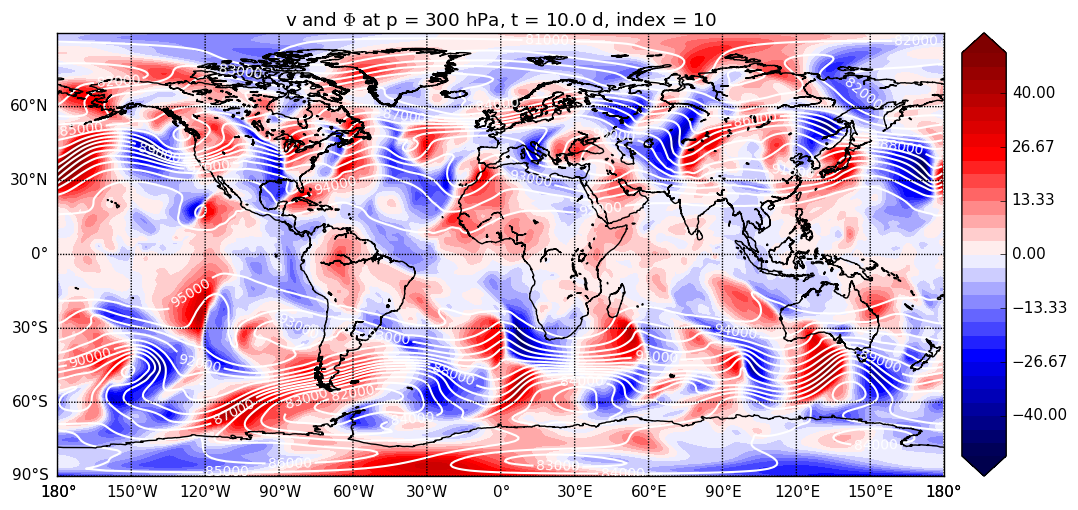

In [5]:
Phi_range = np.arange(0, 100000, 1000)
T_range = np.linspace(210, 245, 31)
v_range = np.linspace(-50, 50, 31)

t = 10.
nt = get_time_index(t)

pl.figure()
m.contourf(lons, lats, T_300[nt,:,:], T_range, cmap=pl.cm.inferno, extend='both')
m.colorbar()

cz = m.contour(lons, lats, Phi_300[nt,:,:], Phi_range, colors='w', linewidths=1.5)
pl.clabel(cz, fontsize=10., fmt='%1.0f')

m.drawcoastlines(color='k')
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,30.)
m.drawmeridians(meridians,labels=[0,0,0,1])
pl.title('T and $\Phi$ at p = 300 hPa, t = {0} d, index = {1}'.format(t, nt));
pl.tight_layout()

pl.figure()
m.contourf(lons, lats, v_300[nt,:,:], v_range, cmap=pl.cm.seismic, extend='both')
m.colorbar()

cz = m.contour(lons, lats, Phi_300[nt,:,:], Phi_range, colors='w', linewidths=1.5)
pl.clabel(cz, fontsize=10., fmt='%1.0f')

m.drawcoastlines(color='k')
# draw parallels.
parallels = np.arange(-90.,90,30.)
m.drawparallels(parallels,labels=[1,0,0,0])
# draw meridians
meridians = np.arange(0.,360.,30.)
m.drawmeridians(meridians,labels=[0,0,0,1])
pl.title('v and $\Phi$ at p = 300 hPa, t = {0} d, index = {1}'.format(t, nt));
pl.tight_layout()

___
### Assignment
#### 1. The time average of the variables
1. Recreate the two plots, but now with the time-averaged temperature $T$, geopotential $\Phi$ and meridional velocity $v$.
2. Do the Rossby waves average out in time? If not, describe the location of stationary waves.
3. How do the patterns at the Northern and Southern hemisphere compare to each other? If they are different, explain why.
4. Create a map with time mean zonal wind $u$ and contours of $\Phi$ and explain what you see.
___
#### 2. The zonal and time average of the variables
1. Calculate the time and zonal averaged of the horizontal wind components $u$ and $v$ at 850 and 300 hPa.
2. Create plots of the averaged $u$ and $v$ with latitude at the horizontal axis and put both heights in the same plot. 
3. Explain the plot of $v$. How many circulations do you observe? What do these circulations represent? Can you see in this plot whether it is summer or winter?
4. Explain the plot of the zonal velocity $u$. What is the most prominent feature you observe in $u$? How does this feature compare between the two heights?
5. Calculate and plot the time and zonal average temperature at both heights. Can you link the observed pattern in $T$ to that in the zonal velocity $u$?
___
#### 3. Mean and eddy transport
In this part of the assignment you will decompose the meriodional transport in that done by the mean wind and that done by baroclinic eddies. The decomposition is explained at Holton, page 329. You will do the same decomposition for the meridional transport of zonal momentum $\overline{uv}$. This you will do step by step at the 300 hPa level. We denote time averages with an overline.
1. Calculate the time averaged zonal and meridional wind component.
2. Create the variables $u^\prime$ and $v^\prime$ that are the original data with the local temporal mean subtracted.
3. Calculate the time averaged $\overline{u^\prime}$ and $\overline{v^\prime}$. Plot the data on a map. What do you observe?
4. Calculate the mean transport $\overline{u}\,\overline{v}$ and take its zonal average.
5. Calculate the eddy transport $\overline{u^\prime v^\prime}$ and take its zonal average.
6. Plot the mean and eddy transport together in one figure and study the Northern Hemisphere.
7. How do the magnitudes of both terms compare? What can you conclude about the importance of baroclinic instabilities in setting the atmosphere at higher latitudes into motion?
8. Make the same plot for temperature at 850 hPa, and explain what you observe.

___
Work out the assignment below.
___